<a href="https://colab.research.google.com/github/Maagnitude/diabetes-xai/blob/main/diabetes_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [2]:
# Import SHAP and XGBoost method libraries
import numpy as np
import xgboost
import shap

In [3]:
#Import diabetes dataset
ds_X, ds_Y = shap.datasets.diabetes()

Τυπώνουμε τα πρώτα 5 δείγματα του dataset, που το έχουμε σε μορφή DataFrame, για να ελέγχξουμε τη αριθμητική μορφή των δεδομένων μας.

In [4]:
ds_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Δεν έχει null values, και όλες οι τιμές του είναι τύπου float.

In [5]:
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(ds_X, ds_Y, test_size=0.2, random_state=0)

In [6]:
#Train an XGBoost regression model
model = xgboost.XGBRegressor().fit(ds_X, ds_Y)
#Estimate the SHAP values for each dataset sample
explainer = shap.Explainer(model)
shap_values = explainer(ds_X)

[14:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## **EXPLANATIONS**

**D. Γράφημα τιμών Shapley για τυχαία επιλεγμένο δείγμα.**
Στο παρακάτω γράφημα τιμών Shapley για το τυχαία επιλεγμένο δείγμα μας (νο.345), παρατηρούμε κάποια πράγματα:
* Αρχικά, το χαρακτηριστικό με την μεγαλύτερη (**αρνητική**) συνεισφορά είναι το bmi (-21.78), και με τη μεγαλύτερη θετική συνεισφορά είναι τα s5 και bp (+12.64 και +12.49).
* Το άθροισμα των συνεισφορών ισούται με την υπολογιζόμενη διαφορά (...)
* 

.values =
array([ 5.5114    , -7.112663  , -7.204452  , -6.7039027 , -1.0729443 ,
       -6.482308  , -0.18400855,  1.9784822 ,  5.429693  , -4.162672  ],
      dtype=float32)

.base_values =
152.08752

.data =
array([ 0.08166637,  0.05068012, -0.00297252, -0.03321358,  0.04246153,
        0.05787118, -0.01026611,  0.03430886, -0.00060925, -0.0010777 ])


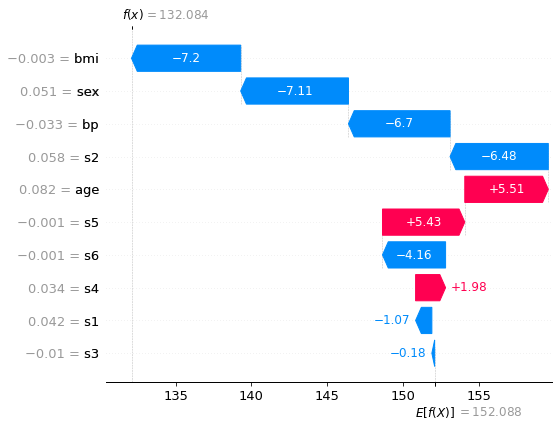

In [31]:
#Define the index of the examined sample for generating local explanations
our_rand_indx = 345
print(shap_values[our_rand_indx])
#Visualize sample SHAP values for given example (local explanation)
shap.plots.waterfall(shap_values[our_rand_indx])

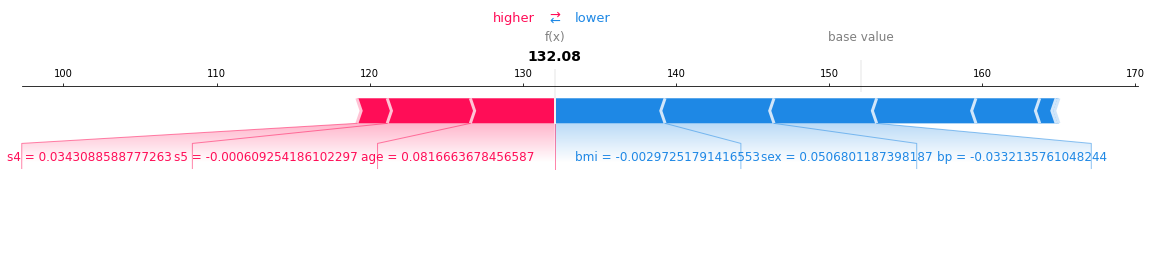

In [13]:
#Visualize (SHAP-based) sample force plot for given example (local explanation)
shap.initjs()
shap.plots.force(shap_values[our_rand_indx], matplotlib=True)

# **F. Γράφημα περίληψης (βάσει τιμών Shapley) για το σύνολο των δειγμάτων**
Στο παρακάτω διάγραμμα περίληψης, έχουμε αριστερά **ιεραρχημένα** τα εξεταζόμενα χαρακτηριστικά των δειγμάτων μας ανάλογα με την **σπουδαιότητα** τους, δεξιά μία μπάρα (**High-Low**) που αφορά τις τιμές των χαρακτηριστικών, και στον οριζόντιο άξονα έχουμε τις τιμές **Shapley**. Ύστερα κάνουμε τις εξής παρατηρήσεις για το σύνολο των δειγμάτων μας:
* **Χαμηλή** τιμή του χαρακτηριστικού **s5**, **μειώνει** τις τιμές των ποσοτικών μετρήσεων που αφορούν τον **Διαβήτη**, ενώ υψηλή τιμή αυτού (**s5**), αυξάνουν τις τιμές των ποσοτικών αυτών μετρήσεων. Το ίδιο ισχύει σε λίγο **μικρότερο βαθμό** και για τις τιμές των χαρακτηριστικών **bmi** και **bp**.
* Σε **αντίθετη** περίπτωση, **χαμηλή** τιμή των χαρακτηριστικών **sex** και **s3**, αυξάνει τις τιμές των ποσοτικών μετρήσεων που αφορούν τον Διαβήτη, ενώ υψηλή τιμή αυτών, μειώνουν τις τιμές των ποσοτικών μετρήσεων. Το ίδιο, σε μικρότερο βαθμό, και για τα χαρακτηριστικά **s2** και **s1** με αρκετά, βέβαια, **outliers** (μεμονωμένες τελείες στα άκρα των τιμών **Shapley**).
* TODO

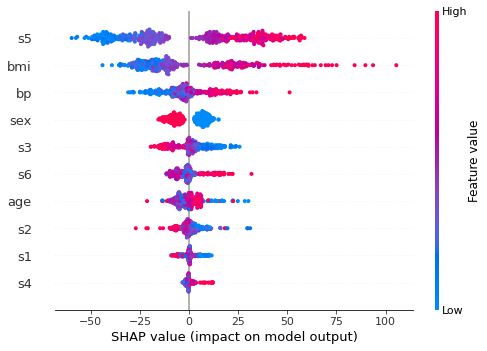

In [14]:
#Visualize (SHAP-based) summary plot of the effects of all features for all dataset samples (global explanation)
shap.initjs()
shap.plots.beeswarm(shap_values)

# **G. Γράφημα μέσης απόλυτης τιμής των τιμών Shapley για το σύνολο των δειγμάτων**
Στο παρακάτω διάγραμμα, οπτικοποιούμε την σπουδαιότητα των χαρακτηριστικών, τα οποία έχουμε στον κάθετο άξονα, ιεραρχιμένα βάσει της σπουδαιότητας αυτής (με φθίνουσα σημασία). Στον οριζόντιο άξονα έχουμε τη μέση απόλυτη τιμή των τιμών Shapley των χαρακτηριστικών, για κάθε δείγμα από το σύνολο των δειγμάτων μας, και κάνουμε τις εξής παρατηρήσεις:
* Το χαρακτηριστικό με την μεγαλύτερη συνεισφορά είναι το **s5** (**+28.89**), και το αμέσως επόμενο είναι το **bmi** (**+22.25**).
* Το χαρακτηριστικό με την μικρότερη συνεισφορά είναι το **s4** (**+1.37**) και το αμέσως επόμενο το **s1** (**+2.33**).
* Το άθροισμα των συνεισφορών ισούται με την υπολογιζόμενη **διαφορά**, η οποία είναι **91.37**.
* TODO

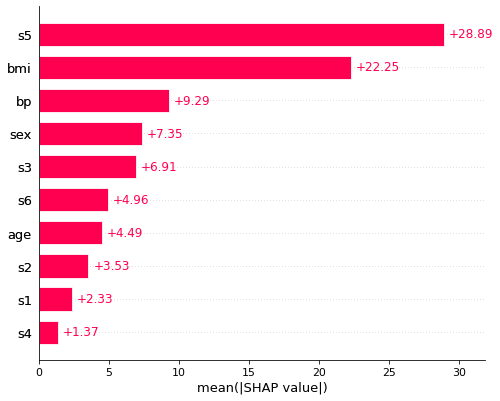

In [29]:
#Visualize mean absolute value of SHAP values for each feature for all dataset samples (global explanation)
shap.initjs()
shap.plots.bar(shap_values)

# **H. Διαδραστικό γράφημα δύναμης για το σύνολο των δειγμάτων (δώστε ενδεικτικά παραδείγματα/εξηγήσεις/παρατηρήσεις από την εξέταση του γραφήματος)**

In [16]:
#Visualize interactive (SHAP-based) force plot for all samples in the dataset (global explanation)
shap.initjs()
shap.plots.force(shap_values)